In [ ]:
!pip install setuptools==64.0.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [ ]:
!apt-get install swig
!pip install wrds
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 27 not upgraded.
Need to get 1,086 kB of archives.
After this operation, 5,413 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig4.0 amd64 4.0.1-5build1 [1,081 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig all 4.0.1-5build1 [5,528 B]
Fetched 1,086 kB in 1s (740 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 129496 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.1-5build1_amd64.deb

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
import itertools

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

In [ ]:
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [ ]:
TRAIN_START_DATE = '2020-04-01'
TRAIN_END_DATE = '2022-01-01'

TEST_START_DATE = '2022-01-01'
TEST_END_DATE = '2023-01-31'

In [ ]:
crypto_ticker_list = ['BTC-USD','ETH-USD', 'DAI-USD','SOL-USD','LTC-BTC', 'TRX-USD']

In [ ]:
df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TEST_END_DATE,
                     ticker_list = crypto_ticker_list).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (6200, 8)


In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2020-04-01,6437.319336,6612.573730,6202.373535,6606.776367,40346426266,BTC-USD,2
1,2020-04-01,1.010974,1.030917,0.994796,1.022713,10886562,DAI-USD,2
2,2020-04-01,133.612320,135.634552,129.730942,135.634552,12456564435,ETH-USD,2
3,2020-04-01,0.006101,0.005961,0.006030,0.005961,500093,LTC-BTC,2
4,2020-04-01,0.011625,0.011639,0.011168,0.011575,810514942,TRX-USD,2


In [ ]:
df.loc[df['tic']=='BTC-USD']

,date,open,high,low,close,volume,tic,day
0,2020-04-01,6437.319336,6612.573730,6202.373535,6606.776367,40346426266,BTC-USD,2
5,2020-04-02,6606.776367,7088.247559,6595.918457,6793.624512,47660646124,BTC-USD,3
10,2020-04-03,6797.396484,7003.220703,6673.335938,6733.387207,38976504903,BTC-USD,4
15,2020-04-04,6738.382812,6878.953613,6696.484863,6867.527344,33185988584,BTC-USD,5
20,2020-04-05,6862.537598,6883.414062,6715.929199,6791.129395,29510409856,BTC-USD,6
...,...,...,...,...,...,...,...,...
6170,2023-01-26,23108.955078,23237.078125,22911.373047,23032.777344,26357839322,BTC-USD,3
6176,2023-01-27,23030.716797,23417.720703,22654.593750,23078.728516,25383335641,BTC-USD,4
6182,2023-01-28,23079.964844,23165.896484,22908.845703,23031.089844,14712928379,BTC-USD,5
6188,2023-01-29,23031.449219,23919.890625,22985.070312,23774.566406,27423687259,BTC-USD,6


In [ ]:
df.shape

(6200, 8)

In [ ]:
df.sort_values(['date','tic'])

,date,open,high,low,close,volume,tic,day
0,2020-04-01,6437.319336,6612.573730,6202.373535,6606.776367,40346426266,BTC-USD,2
1,2020-04-01,1.010974,1.030917,0.994796,1.022713,10886562,DAI-USD,2
2,2020-04-01,133.612320,135.634552,129.730942,135.634552,12456564435,ETH-USD,2
3,2020-04-01,0.006101,0.005961,0.006030,0.005961,500093,LTC-BTC,2
4,2020-04-01,0.011625,0.011639,0.011168,0.011575,810514942,TRX-USD,2
...,...,...,...,...,...,...,...,...
6195,2023-01-30,0.999673,1.000618,0.997846,1.000307,197768240,DAI-USD,0
6196,2023-01-30,1646.147705,1646.651611,1546.660767,1567.326538,9180418120,ETH-USD,0
6197,2023-01-30,0.003998,0.004054,0.003944,0.003996,33603,LTC-BTC,0
6198,2023-01-30,26.135302,26.249315,23.489176,23.946321,1084170329,SOL-USD,0


In [ ]:
df.tic.value_counts()

BTC-USD    1035
DAI-USD    1035
ETH-USD    1035
TRX-USD    1035
LTC-BTC    1034
SOL-USD    1026
Name: tic, dtype: int64

In [ ]:
INDICATORS = ['macd',
               'rsi_30',
               'cci_30',
               'dx_30']
INDICATORS = INDICATORS+['kdjk','open_2_sma','boll','wr_10','dma','trix']

In [ ]:
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = False)

In [ ]:
processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index


In [ ]:
processed

,date,open,high,low,close,volume,tic,day,macd,rsi_30,cci_30,dx_30,kdjk,open_2_sma,boll,wr_10,dma,trix,turbulence
0,2020-04-01,6437.319336,6612.573730,6202.373535,6606.776367,40346426266,BTC-USD,2,0.000000,100.000000,66.666667,100.000000,66.195566,6437.319336,6606.776367,-1.413301,0.000000,0.000000,0.000000
1,2020-04-01,1.010974,1.030917,0.994796,1.022713,10886562,DAI-USD,2,0.000000,100.000000,66.666667,100.000000,59.095737,1.010974,1.022713,-22.712789,0.000000,0.000000,0.000000
2,2020-04-01,133.612320,135.634552,129.730942,135.634552,12456564435,ETH-USD,2,0.000000,100.000000,66.666667,100.000000,66.666667,133.612320,135.634552,-0.000000,0.000000,0.000000,0.000000
3,2020-04-01,0.011625,0.011639,0.011168,0.011575,810514942,TRX-USD,2,0.000000,100.000000,66.666667,100.000000,62.137324,0.011625,0.011575,-13.588027,0.000000,0.000000,0.000000
4,2020-04-02,6606.776367,7088.247559,6595.918457,6793.624512,47660646124,BTC-USD,3,4.192106,100.000000,66.666667,100.000000,66.377746,6522.047852,6700.200439,-33.257894,0.000000,0.449465,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2023-01-29,0.063096,0.064366,0.062998,0.063794,298809875,TRX-USD,6,0.001886,60.012138,95.055202,33.248567,77.196984,0.063340,0.060962,-11.600002,0.005354,0.523850,1.317989
4136,2023-01-30,23774.648438,23789.347656,22657.582031,22840.138672,27205595568,BTC-USD,0,1379.181931,67.242411,82.709770,56.894562,65.019427,23403.048828,21764.926855,-70.480342,4145.123867,1.198398,2.379000
4137,2023-01-30,0.999673,1.000618,0.997846,1.000307,197768240,DAI-USD,0,0.000034,52.103372,-72.688536,14.456457,56.550268,0.999793,0.999904,-33.268020,-0.000029,-0.000153,2.379000
4138,2023-01-30,1646.147705,1646.651611,1546.660767,1567.326538,9180418120,ETH-USD,0,70.624448,58.171475,58.897367,23.592274,48.949207,1609.388611,1563.620801,-74.523426,237.812485,0.888845,2.379000


In [ ]:
stock_dimension = len(processed.tic.unique())
print(INDICATORS)
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

['macd', 'rsi_30', 'cci_30', 'dx_30', 'kdjk', 'open_2_sma', 'boll', 'wr_10', 'dma', 'trix']
Stock Dimension: 4, State Space: 49


In [ ]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4,
    "print_verbosity":5

}

In [ ]:
rebalance_window = 63 #63 # rebalance_window is the number of days to retrain the model
validation_window = 63 #63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(TRAIN_START_DATE,TRAIN_END_DATE),
                 val_test_period=(TEST_START_DATE,TEST_END_DATE),
                 rebalance_window=rebalance_window,
                 validation_window=validation_window,
                 **env_kwargs)

# e_train_gym = StockTradingEnv(df=processed, **env_kwargs)


In [ ]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.005,
                    'learning_rate': 0.0007
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2,
                    "learning_rate": 0.00025,
                    "batch_size": 128
                    }

DDPG_model_kwargs = {
                      "buffer_size": 1,
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

# TD3_model_kwargs = {
#                     "batch_size": 128,
#                     "buffer_size": 1000000,
#                     "learning_rate": 0.0003
#                     }

# SAC_model_kwargs = {
#                     "batch_size": 128,
#                     "buffer_size": 100000,
#                     "learning_rate": 0.0001,
#                     "learning_starts": 100,
#                     "ent_coef": "auto_0.1",
#                     }

timesteps_dict = {'a2c' : 2,
                 'ppo' : 2,
                 'ddpg' : 2
                 }

In [ ]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  35.98108711369445
======Model training from:  2020-04-01 to  2022-01-02
======A2C Training========
{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0007}
Using cpu device
Logging to tensorboard_log/a2c/a2c_126_1
======A2C Validation from:  2022-01-02 to  2022-03-06
A2C Sharpe Ratio:  -0.060271032524468526
======PPO Training========
{'ent_coef': 0.01, 'n_steps': 2, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device
Logging to tensorboard_log/ppo/ppo_126_1
------------------------------------
| time/              |             |
|    fps             | 73          |
|    iterations      | 1           |
|    time_elapsed    | 0           |
|    total_timesteps | 2           |
| train/             |             |
|    reward          | -0.71657103 |
------------------------------------
======PPO Validation from:  2022-01-02 to  2022-03-06
PPO Sharpe Ratio:  -0.17755817839195492
======DDPG Training========


In [ ]:
df_summary

,Iter,Val Start,Val End,Model Used,A2C Sharpe,PPO Sharpe,DDPG Sharpe
0,126,2022-01-02,2022-03-06,A2C,-0.060271,-0.177558,-0.216468
1,189,2022-03-06,2022-05-08,PPO,-0.139003,-0.010847,-0.038815
2,252,2022-05-08,2022-07-10,A2C,-0.205942,-0.367964,-0.323125
3,315,2022-07-10,2022-09-11,A2C,0.317137,0.079028,0.310217
4,378,2022-09-11,2022-11-13,A2C,-0.157495,-0.183783,-0.200585


In [ ]:
unique_trade_date = processed[(processed.date > TEST_START_DATE)&(processed.date <= TEST_END_DATE)].date.unique()

In [ ]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})
df_trade_date

,datadate
0,2022-01-02
1,2022-01-03
2,2022-01-04
3,2022-01-05
4,2022-01-06
...,...
389,2023-01-26
390,2023-01-27
391,2023-01-28
392,2023-01-29


In [ ]:
df_account_value=pd.DataFrame()

for i in range(rebalance_window+validation_window, len(unique_trade_date)+1, rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))
    df_account_value = df_account_value.append(temp, ignore_index=True)

sharpe=round((252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std(),2)

print('Sharpe Ratio: ',sharpe)

Sharpe Ratio:  -0.56


In [ ]:
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))
df_account_value

,account_value,date,daily_return,datadate
0,1.000000e+06,2022-03-06,NaN,2022-03-06
1,1.000000e+06,2022-03-07,0.000000e+00,2022-03-07
2,1.000000e+06,2022-03-08,1.391028e-07,2022-03-08
3,1.004514e+06,2022-03-09,4.513767e-03,2022-03-09
4,1.004432e+06,2022-03-10,-8.180466e-05,2022-03-10
...,...,...,...,...
310,6.155822e+05,2023-01-10,1.243570e-02,2023-01-10
311,6.194495e+05,2023-01-11,6.282253e-03,2023-01-11
312,6.248617e+05,2023-01-12,8.737117e-03,2023-01-12
313,6.325040e+05,2023-01-13,1.223041e-02,2023-01-13


In [ ]:
df_account_value['account_value'].tail()

310    615582.249933
311    619449.493534
312    624861.696136
313    632504.013382
314    670231.972169
Name: account_value, dtype: float64

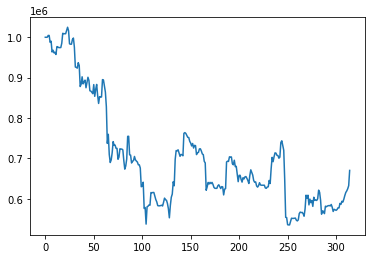

In [ ]:
%matplotlib inline
df_account_value.account_value.plot()

In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return         -0.273927
Cumulative returns    -0.329768
Annual volatility      0.418247
Sharpe ratio          -0.555734
Calmar ratio          -0.573507
Stability              0.614252
Max drawdown          -0.477636
Omega ratio            0.889132
Sortino ratio         -0.738445
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.995395
Daily value at risk   -0.053617
dtype: float64


In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="BTC-USD",
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (314, 8)
Annual return         -0.409967
Cumulative returns    -0.481791
Annual volatility      0.510450
Sharpe ratio          -0.776346
Calmar ratio          -0.614278
Stability              0.820537
Max drawdown          -0.667396
Omega ratio            0.864596
Sortino ratio         -1.008976
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.857488
Daily value at risk   -0.065883
dtype: float64


In [ ]:
baseline_df

,date,open,high,low,close,volume,tic,day
0,2022-03-06,39404.199219,39640.175781,38211.648438,38419.984375,19745229902,BTC-USD,6
1,2022-03-07,38429.304688,39430.226562,37260.203125,38062.039062,28546143503,BTC-USD,0
2,2022-03-08,38059.902344,39304.441406,37957.386719,38737.269531,25776583476,BTC-USD,1
3,2022-03-09,38742.816406,42465.671875,38706.093750,41982.925781,32284121034,BTC-USD,2
4,2022-03-10,41974.070312,42004.726562,38832.941406,39437.460938,31078064711,BTC-USD,3
...,...,...,...,...,...,...,...,...
309,2023-01-09,17093.992188,17389.957031,17093.992188,17196.554688,18624736866,BTC-USD,0
310,2023-01-10,17192.949219,17484.720703,17162.990234,17446.292969,15808338949,BTC-USD,1
311,2023-01-11,17446.359375,17934.896484,17337.994141,17934.896484,18372283782,BTC-USD,2
312,2023-01-12,18117.593750,19030.087891,17995.203125,18869.587891,34971338710,BTC-USD,3


In [ ]:
!pip install alpaca-trade-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from alpaca_trade_api.rest import REST, TimeFrame
import pandas as pd

In [ ]:
# #I make a cryptocurrency trading bot and hand it a $1000 dollars and leave it to trade that unsupervised for a week.
api_key = 'your_api_key'
secret_key = 'your_secret_key'

In [ ]:
# Instantiate REST API Connection
# paper_url = "https://paper-api.alpaca.markets"
live_url = "https://api.alpaca.markets"
api = REST(key_id=api_key,secret_key=secret_key,base_url=live_url)

In [ ]:
balance = float(api.get_account().buying_power)

In [ ]:
def get_crypto_current_price(ticker):
  bars = list(api.get_latest_crypto_bars(symbols=[ticker], exchange='BNCU').items())
  # print(price[1].__dict__)
  for item in bars:
    current_price=item[1].o
  return current_price

def get_crypto_quantity(size, ticker):
  used_balance = balance*size/100
  quantity = used_balance/get_crypto_current_price(ticker)
  return quantity


In [ ]:
def get_position(ticker):
  positions = api.list_positions()
  position_qty = 0
  for position in positions:
      if position.symbol == ticker:
          position_qty = float(position.qty)
  return position_qty

In [ ]:

def get_action(sharpe):
  if sharpe > 0.4:
    return 'BUY'
  elif sharpe <-0.4:
    return 'SELL'
  else:
    return "HOLD"

In [ ]:
action = get_action(sharpe)
print(f'action is ',action)

action is  SELL


In [ ]:
def create_order(symbol, qty, action_):
  api.submit_order(
      symbol=symbol,
      qty=qty,
      side = action_,
      time_in_force = 'gtc'
  )

In [ ]:
def crypto_trading(ticker,size=70):
  if size>0 and size<=100:

    position_qty = get_position(ticker)
    if action == 'BUY':

      if position_qty == 0:
        if balance >= quantity*get_crypto_current_price(ticker):
          quantity = get_crypto_quantity(size, ticker)
          market_order = create_order(ticker, float(quantity), 'buy')
          print('Your buy order has been created successfully.')

        else:
          print('you have insufficient balance')
      else:
        print('you already have this asset.')

    elif action == 'SELL':

      if position_qty > 0:
        market_order = create_order(ticker, position_qty, 'sell')
        print('Your sell order has been created successfully.')
      else:
        print(f'You do not have any assets of {ticker}. please wait for buy signal')

    else:
      print('No trades for today')
  else:
    print('size can be 1 to 100. please choose it between 1 to 100.')

In [ ]:
#Here size can be 1 to 100. It will show you what percentage of your balance is to be used for trading
crypto_trading('ETHUSD', size=1)

You do not have any assets of ETHUSD. please wait for buy signal
